In [ ]:
#installation of the required libraries

!pip install googletrans
!pip install openpyxl
!pip install TextBlob
!pip install gspread
!pip install --upgrade plotly

In [ ]:
#import all libraries

import warnings
warnings.filterwarnings('ignore')

import requests
import urllib.request
import time
from bs4 import BeautifulSoup

import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import plotly.express as px

import googletrans
from googletrans import Translator

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import textblob
from textblob import TextBlob

from google.colab import auth
import gspread
from oauth2client.client import GoogleCredentials

from collections import OrderedDict, defaultdict, Counter
import csv
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#urls to be scraped
URL = [('Year of the Elephant 1','https://www.goodreads.com/book/show/245256.Year_of_the_Elephant','reviewText stacked'),
       ('Year of the Elephant 2','https://www.goodreads.com/book/show/6809360-year-of-the-elephant?rating=4&utm_medium=api&utm_source=book_widget','reviewText stacked'),
       ('Celestial Bodies 1','https://www.goodreads.com/book/show/39653535-celestial-bodies','reviewText stacked'),
       ('Celestial Bodies 1','https://www.goodreads.com/book/show/39653535-celestial-bodies','reviewText mediumText description readable'),
       ('Celestial Bodies 2','https://www.goodreads.com/review/show/2909065240','reviewText mediumText description readable'),
       ('Celestial Bodies 3','https://www.goodreads.com/review/show/2909065240','reviewText stacked'),
       ('Celestial Bodies 4','https://www.goodreads.com/review/show/2748676786','reviewText mediumText description readable'),
       ('Celestial Bodies 5','https://www.goodreads.com/review/show/2748676786','reviewText stacked'),
       ('Celestial Bodies 6','https://www.goodreads.com/review/show/2748655998','reviewText mediumText description readable'),
       ('Celestial Bodies 7','https://www.goodreads.com/review/show/2748655998','reviewText stacked'),
       ('The Woman from Tantoura 1','https://www.goodreads.com/review/show/1160668061','reviewText stacked'),
       ('The Woman from Tantoura 2','https://www.goodreads.com/review/show/1160668061','reviewText mediumText description readable'),
       ('The Woman from Tantoura 3','https://www.goodreads.com/book/show/8239301','reviewText stacked'),
       ('The Woman from Tantoura 4','https://www.goodreads.com/book/show/17678418-the-woman-from-tantoura','reviewText stacked'),
       ('The Woman from Tantoura 5','https://www.goodreads.com/review/show/112611057','reviewText mediumText description readable'),
       ('Granada 1','https://www.goodreads.com/book/show/218562.Granada','reviewText stacked'),
       ('Granada 2','https://www.goodreads.com/book/show/218562.Granada','reviewText mediumText description readable'),
       ('Granada 3','https://www.goodreads.com/en/book/show/3438000','reviewText stacked'),
       ('Granada 4','https://www.goodreads.com/fr/book/show/27269009-the-woman-from-tantoura','reviewText mediumText description readable'),
       ('Granada 5','https://www.goodreads.com/book/show/17678418-the-woman-from-tantoura','reviewText stacked'),
       ('Granada 6','https://www.goodreads.com/review/show/1221720588','reviewText stacked'),
       ('Granada 7','https://www.goodreads.com/review/show/1221720588','reviewText mediumText description readable'),
       ('Granada 8','https://www.goodreads.com/review/show/81642717','reviewText stacked'),
       ('Granada 9','https://www.goodreads.com/review/show/81642717','reviewText mediumText description readable'),
       ('Blue Lorries','https://www.goodreads.com/book/show/18049202-blue-lorries','reviewText mediumText description readable'),
       ('The House on Arnus Square','https://www.goodreads.com/book/show/3544759-the-house-on-arnus-square','reviewText stacked'),
       ('A compass for the sunflower','https://www.goodreads.com/book/show/2328001.A_Compass_for_the_Sunflower','reviewText mediumText description readable'),
       ('A Balcony Over The Fakihani 1','https://www.goodreads.com/book/show/4534538-a-balcony-over-the-fakihani','reviewText stacked'),
       ('A Balcony Over The Fakihani 2','https://www.goodreads.com/book/show/4534538-a-balcony-over-the-fakihani','reviewText mediumText description readable'),
       ('A Balcony Over The Fakihani 3','https://www.goodreads.com/book/show/286782.A_Balcony_Over_the_Fakihani','reviewText stacked'),
       ('A Balcony Over The Fakihani 4','https://www.goodreads.com/book/show/286782.A_Balcony_Over_the_Fakihani','reviewText mediumText description readable'),
       ('A Balcony Over The Fakihani 5','https://www.goodreads.com/review/show/3174682387','reviewText mediumText description readable'),
       ('The Eye of the Mirror 1','https://www.goodreads.com/book/show/5792114-the-eye-of-the-mirror','reviewText stacked'),
       ('The Eye of the Mirror 2','https://www.goodreads.com/book/show/5792114-the-eye-of-the-mirror','reviewText mediumText description readable'),
       ('The Man from Bashmour','https://www.goodreads.com/book/show/1177207.The_Man_from_Bashmour','reviewText mediumText description readable'),       
       ('The Wiles of Men and Other Stories 1','https://www.goodreads.com/book/show/1177205.The_Wiles_of_Men_and_Other_Stories','reviewText stacked'),      
       ('The Wiles of Men and Other Stories 2','https://www.goodreads.com/review/show/398872587','reviewText mediumText description readable'),
       ('The Wiles of Men and Other Stories 3','https://www.goodreads.com/book/show/4947328-the-wiles-of-men-and-other-stories','reviewText mediumText description readable'),
       ('The Wiles of Men and Other Stories 4','https://www.goodreads.com/book/show/4947328-the-wiles-of-men-and-other-stories','rreviewText stacked'),
       ('The Wiles of Men and Other Stories 5','https://www.goodreads.com/review/show/2247595169','reviewText mediumText description readable'),
       ('The Stone of Laughter','http://www.librarything.com/work/1110230/reviews/160664538','commentText'),
       ('The Tiller of the Waters 1','https://www.goodreads.com/book/show/4510433-the-tiller-of-the-waters','reviewText stacked'),   
       ('The Tiller of the Waters 2','https://www.goodreads.com/book/show/4510433-the-tiller-of-the-waters','reviewText mediumText description readable'), 
       ('The Tiller of the Waters 3','https://arablit.org/2010/07/03/one-minute-review-hoda-barakats-tiller-of-waters/','entry-content'), 
       ('The Tiller of the Waters 4','https://mdbrady.wordpress.com/2017/04/17/the-tiller-of-waters-by-hoda-barakat/','entry clear'), 
       ('The Tiller of the Waters 5','https://thegoodbookcorner.com/2015/09/27/the-tiller-of-waters-by-hoda-barakat/','single'), 
       ('The Tiller of the Waters 6','https://readkutub.wordpress.com/2009/11/02/tiller-of-the-waters-harith-al-miyah-by-hoda-barakat/','entry-content'), 
       ('Disciples of passion 1','https://www.goodreads.com/book/show/1139212.Disciples_of_Passion','reviewText stacked'),
       ('Disciples of passion 2','https://www.goodreads.com/book/show/1139212.Disciples_of_Passion','reviewText mediumText description readable'),
       ('Algerian White: A Narrative 1','https://www.goodreads.com/review/show/2042990459','reviewText mediumText description readable'),
       ('Algerian White: A Narrative 2','http://www.librarything.com/work/2021065/reviews/100655933','commentText'),
       ('Children of the New World','http://www.librarything.com/work/1536931/reviews/132259156','commentText'),       
       ('Fantasia: An Algerian Cavalcade 1','http://www.librarything.com/work/296224/reviews/156071930','commentText'),
       ('Fantasia: An Algerian Cavalcade 2','https://www.goodreads.com/book/show/457864.Fantasia','reviewText stacked'),
       ('Fantasia: An Algerian Cavalcade 3','https://www.goodreads.com/review/show/4598459','reviewText mediumText description readable'),
       ('Fantasia: An Algerian Cavalcade 4','https://www.goodreads.com/review/show/2298343504','reviewText mediumText description readable'),
       ('Fantasia: An Algerian Cavalcade 5','https://www.goodreads.com/review/show/2298343504','reviewText stacked'),
       ('Fantasia: An Algerian Cavalcade 6','https://www.goodreads.com/review/show/1006690824','reviewText mediumText description readable'),
       ('Fantasia: An Algerian Cavalcade 7','https://www.goodreads.com/book/show/457864.Fantasia','reviewText mediumText description readable'),
       ('Fantasia: An Algerian Cavalcade 8','https://www.goodreads.com/book/show/74700.Fantasia','reviewText mediumText description readable'),
       ('Fantasia: An Algerian Cavalcade 9','https://www.goodreads.com/book/show/74700.Fantasia','reviewText stacked'),
       ('A Sister to Scheherazade 1','https://www.goodreads.com/book/show/388218.A_Sister_to_Scheherazade_Emerging_Voices','reviewText stacked'),
       ('A Sister to Scheherazade 2','https://www.goodreads.com/book/show/388218.A_Sister_to_Scheherazade_Emerging_Voices','reviewText mediumText description readable'),
       ('A Sister to Scheherazade 3','https://www.goodreads.com/review/show/1071490491','reviewText mediumText description readable'),
       ('A Sister to Scheherazade 4','https://www.goodreads.com/review/show/681424353','reviewText mediumText description readable'),
       ('A Sister to Scheherazade 5','https://www.goodreads.com/book/show/937191.A_Sister_to_Scheherazade','reviewText stacked'),
       ('A Sister to Scheherazade 6','https://www.goodreads.com/book/show/937191.A_Sister_to_Scheherazade','reviewText mediumText description readable'),
       ('A Sister to Scheherazade 7','https://caughtbetweenthepages.wordpress.com/tag/a-sister-to-scheherazade/','entry-content'),
       ('A Sister to Scheherazade 8','http://howlingfrog.blogspot.com/2018/08/a-sister-to-scheherazade-wit-month-and.html','post-body entry-content'),
       ('Women of Algiers in Their Apartment 1','https://www.goodreads.com/book/show/4688851-women-of-algiers-in-their-apartment','reviewText stacked'),
       ('Women of Algiers in Their Apartment 2','https://www.goodreads.com/book/show/4688851-women-of-algiers-in-their-apartment','reviewText mediumText description readable'),
       ('Women of Algiers in Their Apartment 3','http://www.librarything.com/work/378749/reviews/82106703','commentText'),
       ('Women of Algiers in Their Apartment 4','https://www.goodreads.com/review/show/913987416','reviewText mediumText description readable'),
       ('Velvet 1','https://www.goodreads.com/book/show/48571883-velvet','reviewText mediumText description readable'),
       ('Velvet 2','https://www.goodreads.com/book/show/48571883-velvet','reviewText stacked'),
       ('Sabriya: Damascus Bitter Sweet 1','https://www.goodreads.com/book/show/1092712.Sabriya','reviewText stacked'),
       ('Sabriya: Damascus Bitter Sweet 2','https://www.goodreads.com/book/show/1092712.Sabriya','reviewText mediumText description readable'),
       ('Sabriya: Damascus Bitter Sweet 4','https://www.goodreads.com/en/book/show/10224031','reviewText stacked'),
       ('''Grandfather's Tale 1''','https://www.goodreads.com/review/show/2649106838','reviewText mediumText description readable'),
       ('''Grandfather's Tale 2''','https://www.goodreads.com/book/show/290136.Grandfather_s_Tale','reviewText stacked'),
       ('''Grandfather's Tale 3''','https://www.goodreads.com/book/show/290136.Grandfather_s_Tale','reviewText mediumText description readable'),
       ('American Granddaughter','https://www.goodreads.com/book/show/15793844-the-american-granddaughter','reviewText mediumText description readable'),
       ('The End of Spring 1','https://www.goodreads.com/book/show/1175926.The_End_of_Spring','reviewText stacked'),
       ('The End of Spring 2','https://www.goodreads.com/book/show/1175926.The_End_of_Spring','reviewText mediumText description readable'),
       ('The Inheritance 1','https://www.goodreads.com/book/show/218443.The_Inheritance','reviewText stacked'),
       ('The Inheritance 2','https://www.goodreads.com/book/show/218443.The_Inheritance','reviewText mediumText description readable'),
       ('The Inheritance 3','https://www.goodreads.com/book/show/218443.The_Inheritance?rating=2&utm_medium=api&utm_source=blog_book','reviewText mediumText description readable'),
       ('The Inheritance 4','https://arabicbookworm.wordpress.com/2016/12/06/the-inheritance/','entry-content'),
       ('Of Noble Origins: A Modern Palestinian Novel 1','https://www.goodreads.com/book/show/12697984-of-noble-origins','reviewText stacked'),
       ('Of Noble Origins: A Modern Palestinian Novel 2','https://www.goodreads.com/book/show/12697984-of-noble-origins','reviewText mediumText description readable'),
       ('The Image, the Icon, and the Covenant','https://www.goodreads.com/book/show/1175927.The_Image_the_Icon_and_the_Covenant','reviewText stacked'),
       ('The Image, the Icon, and the Covenant','https://www.goodreads.com/book/show/1175927.The_Image_the_Icon_and_the_Covenant','reviewText mediumText description readable'),
       ('Wild Thorns (Saqi) 1','http://www.librarything.com/work/28895/reviews/24886133','commentText'),
       ('Wild Thorns (Saqi) 2','https://www.goodreads.com/review/show/1676144','reviewText mediumText description readable'),
       ('Wild Thorns (Saqi) 3','https://www.goodreads.com/review/show/1623104161','reviewText mediumText description readable'),
       ('Wild Thorns (Saqi) 4','https://www.goodreads.com/book/show/780880.Wild_Thorns','reviewText mediumText description readable'),
       ('Wild Thorns (Saqi) 5','https://www.goodreads.com/book/show/780880.Wild_Thorns','reviewText stacked'),
       ('Wild Thorns (Saqi) 6','https://www.goodreads.com/book/show/3839957-wild-thorns','reviewText mediumText description readable'),
       ('Wild Thorns (Saqi) 7','https://www.goodreads.com/book/show/3839957-wild-thorns','reviewText stacked'),
       ('A Sky So Close 1','http://www.librarything.com/work/373648/reviews/32163656','commentText'),
       ('A Sky So Close 2','https://www.goodreads.com/book/show/1452240.A_Sky_So_Close','reviewText stacked'), 
       ('A Sky So Close 2','https://www.goodreads.com/book/show/1452240.A_Sky_So_Close','reviewText mediumText description readable'),  
       ('Absent 1','https://www.goodreads.com/book/show/2600673','reviewText stacked'),
       ('Absent 2','https://www.goodreads.com/review/show/146503031','reviewText mediumText description readable'),
       ('Absent 3','https://www.fantasticfiction.com/k/betool-khedairi/absent.htm#:~:text=Tightly%20crafted%20and%20skillfully%20told,resilience%20of%20the%20human%20spirit.','blurb'),
       ('Absent 4','https://www.goodreads.com/book/show/1446454.Absent','reviewText stacked'),
       ('Absent 5','https://www.goodreads.com/book/show/1446454.Absent','reviewText mediumText description readable'),
       ('Absent 6','http://www.farmlanebooks.co.uk/2011/absent-betool-khedairi/','entry-content'),
       ('Absent 7','http://www.farmlanebooks.co.uk/2011/absent-betool-khedairi/','comments-inner section-inner thin max-percentage'),
       ('Mothballs 1','https://www.goodreads.com/book/show/935032.Mothballs','reviewText stacked'),   
       ('Mothballs 2','https://www.goodreads.com/book/show/935032.Mothballs','reviewText mediumText description readable'),  
       ('Naphtalene: A Novel of Baghdad 1','https://www.goodreads.com/book/show/642182.Naphtalene','reviewText stacked'),   
       ('Naphtalene: A Novel of Baghdad 2','https://www.goodreads.com/book/show/642182.Naphtalene','reviewText mediumText description readable'),  
       ('The Loved Ones 1','https://www.goodreads.com/book/show/1968589.The_Loved_Ones','reviewText stacked'),
       ('The Loved Ones 2','https://www.goodreads.com/book/show/1968589.The_Loved_Ones','reviewText mediumText description readable'),
       ('The Loved Ones 3','https://www.goodreads.com/en/book/show/27473549-the-loved-ones','reviewText stacked'),
       ('The Loved Ones 4','https://www.goodreads.com/en/book/show/27473549-the-loved-ones','reviewText mediumText description readable'),
       ('Memory in the Flesh 1','https://www.goodreads.com/book/show/426499.Memory_in_the_Flesh','reviewText stacked'),
       ('Memory in the Flesh 2','https://www.goodreads.com/book/show/426499.Memory_in_the_Flesh','reviewText mediumText description readable'),
       ('Memory in the Flesh 3','https://www.goodreads.com/review/show/1302627506','reviewText mediumText description readable'),
       ('Memory in the Flesh 4','https://www.goodreads.com/review/show/174425915','reviewText mediumText description readable'),
       ('Memory in the Flesh 5','https://www.goodreads.com/book/show/2738211-memory-in-the-flesh','reviewText stacked'),
       ('Memory in the Flesh 6','https://www.goodreads.com/book/show/2738211-memory-in-the-flesh','reviewText mediumText description readable'),
       ('Memory in the Flesh 7','https://bookertalk.com/memory-in-the-flesh-book-review/','entry clear-block'),
       ('Memory in the Flesh 8','https://www.goodreads.com/review/show/2413473823','reviewText mediumText description readable'),
       ('The Art of Forgetting 1','https://www.goodreads.com/book/show/21254858-the-art-of-forgetting','reviewText stacked'),
       ('The Art of Forgetting 2','https://www.goodreads.com/book/show/21254858-the-art-of-forgetting','reviewText mediumText description readable'),
       ('The Art of Forgetting 3','https://web.archive.org/web/20140423213335/http://www.banipal.co.uk/book_reviews/88/the-art-of-forgetting-by-ahlem-mosteghanemi/','page_content selections_page_content'),
       ('Chaos of the Senses 1','https://www.goodreads.com/en/book/show/2501455._','reviewText stacked'),   
       ('Chaos of the Senses 2','https://www.goodreads.com/review/show/1520499883','reviewText mediumText description readable'), 
       ('Chaos of the Senses 3','https://www.goodreads.com/book/show/23921864-chaos-of-the-senses','reviewText stacked'),   
       ('Chaos of the Senses 4','https://www.goodreads.com/book/show/23921864-chaos-of-the-senses','reviewText mediumText description readable'), 
       ('Chaos of the Senses 5','https://www.goodreads.com/book/show/2389865.Chaos_of_the_Senses','reviewText stacked'), 
       ('Chaos of the Senses 6','https://www.goodreads.com/book/show/2389865.Chaos_of_the_Senses','reviewText mediumText description readable'), 
       ('Flight Against Time 1','https://www.goodreads.com/book/show/2145978.Flight_Against_Time','reviewText stacked'),
       ('Flight Against Time 2','https://www.goodreads.com/book/show/2350641.Flight_Against_Time?from_search=true&rating=1&search_version=service','reviewText mediumText description readable'),
       ('''Zubaida's Window 1''','https://www.goodreads.com/review/show/30841242','reviewText mediumText description readable'),
       ('''Zubaida's Window 2''','https://www.goodreads.com/book/show/3065015-zubaida-s-window','reviewText stacked'),
       ('''Zubaida's Window 3''','https://www.goodreads.com/book/show/3065015-zubaida-s-window','reviewText mediumText description readable'),
       ('Leaves of Narcissus','https://www.goodreads.com/book/show/532386.Leaves_of_Narcissus?rating=4','reviewText mediumText description readable'),     
       ('Distant View of a Minaret and Other Stories 1','https://www.goodreads.com/review/show/1264646788','reviewText stacked'),
       ('Distant View of a Minaret and Other Stories 2','https://www.goodreads.com/review/show/1264646788','reviewText mediumText description readable'),
       ('Distant View of a Minaret and Other Stories 3','https://www.goodreads.com/review/show/811136695','reviewText stacked'),
       ('Distant View of a Minaret and Other Stories 4','https://www.goodreads.com/review/show/811136695','reviewText mediumText description readable'),
       ('Distant View of a Minaret and Other Stories 5','https://www.goodreads.com/review/show/885032747','reviewText stacked'),
       ('Distant View of a Minaret and Other Stories 6','https://www.goodreads.com/review/show/885032747','reviewText mediumText description readable'),
       ('Distant View of a Minaret and Other Stories 7','https://www.goodreads.com/book/show/23530034-distant-view-of-a-minaret-and-other-stories','reviewText stacked'),
       ('Distant View of a Minaret and Other Stories 8','https://www.goodreads.com/book/show/23530034-distant-view-of-a-minaret-and-other-stories','reviewText mediumText description readable'), 
       ('Distant View of a Minaret and Other Stories 2','http://www.librarything.com/work/155334/reviews/150026368','commentText'),
       ('Memoirs of a Woman Doctor 1','http://www.librarything.com/work/408928/reviews/150026351','commentText'),
       ('Memoirs of a Woman Doctor 2','https://www.goodreads.com/review/show/2770186308','reviewText stacked'),
       ('Memoirs of a Woman Doctor 3','https://www.goodreads.com/book/show/27282252-memoirs-of-a-woman-doctor','reviewText mediumText description readable'),
       ('Memoirs of a Woman Doctor 4','https://www.goodreads.com/book/show/27282252-memoirs-of-a-woman-doctor','reviewText stacked'),
       ('Memoirs of a Woman Doctor 5','https://www.goodreads.com/review/show/1844769553','reviewText mediumText description readable'),
       ('Memoirs of a Woman Doctor 6','https://www.goodreads.com/book/show/14290073','reviewText stacked'),
       ('Memoirs of a Woman Doctor 7','https://www.goodreads.com/book/show/14290073','reviewText mediumText description readable'),
       ('Memoirs of a Woman Doctor 6','https://www.goodreads.com/book/show/817660.Memoirs_of_a_Woman_Doctor','reviewText stacked'),
       ('Memoirs of a Woman Doctor 7','https://www.goodreads.com/book/show/817660.Memoirs_of_a_Woman_Doctor','reviewText mediumText description readable'),
       ('Memoirs of a Woman Doctor 8','https://blogs.bmj.com/medical-humanities/2015/11/11/the-reading-room-a-review-of-memoirs-of-a-woman-doctor/','entry-content'),
       ('Memoirs of a Woman Doctor 9','http://thebluebookcase.blogspot.com/2011/09/review-memoirs-of-woman-doctor-by-nawal.html','post-body entry-content'),
       ('Memoirs of a Woman Doctor 10','http://biblibio.blogspot.com/2016/08/witmonth-day-13-memoirs-of-woman-doctor.html','post-body entry-content'),
       ('Woman at Point Zero 1','http://www.librarything.com/work/124574/reviews/158221380','commentText'),
       ('Woman at Point Zero 2','https://www.goodreads.com/review/show/655634592','reviewText stacked'),
       ('Woman at Point Zero 3','https://www.goodreads.com/review/show/655634592','reviewText mediumText description readable'),
       ('Woman at Point Zero 4','https://www.goodreads.com/review/show/863236797','reviewText stacked'),
       ('Woman at Point Zero 5','https://www.goodreads.com/review/show/863236797','reviewText mediumText description readable'),
       ('Woman at Point Zero 6','https://www.goodreads.com/review/show/3392164848','reviewText stacked'),
       ('Woman at Point Zero 7','https://www.goodreads.com/review/show/3392164848','reviewText mediumText description readable'),
       ('Woman at Point Zero 8','https://www.goodreads.com/book/show/159604.Woman_at_Point_Zero','reviewText stacked'),
       ('Woman at Point Zero 9','https://www.goodreads.com/review/show/655634592','reviewText mediumText description readable'),
       ('Woman at Point Zero 10','https://www.goodreads.com/book/show/1022540.Woman_at_Point_Zero','reviewText stacked'),
       ('Woman at Point Zero 11','https://www.goodreads.com/book/show/1022540.Woman_at_Point_Zero','reviewText mediumText description readable'),
       ('Love in the Kingdom of Oil 1','https://www.goodreads.com/book/show/7848478','reviewText stacked'),
       ('Love in the Kingdom of Oil 2','https://www.goodreads.com/book/show/7848478','reviewText mediumText description readable'),
       ('Love in the Kingdom of Oil 3','https://www.goodreads.com/book/show/426345.Love_in_the_Kingdom_of_Oil','reviewText stacked'),
       ('Love in the Kingdom of Oil 4','https://www.goodreads.com/book/show/426345.Love_in_the_Kingdom_of_Oil','reviewText mediumText description readable'),
       ('Love in the Kingdom of Oil 5','https://www.goodreads.com/review/show/1336469865','reviewText mediumText description readable'),
       ('Love in the Kingdom of Oil 6','https://kinnareads.com/2011/11/03/love-in-the-kingdom-of-oil-nawal-el-saadawi/','entry-content'),      
       ('Beirut 75- A Novel','https://books.google.com/books?id=j3pyniooGX8C&sitesec=reviews','reviewText mediumText description readable'),
       ('Girls of Riyadh 1','https://www.bookreporter.com/reviews/girls-of-riyadh','article'),
       ('Girls of Riyadh 2','https://www.goodreads.com/review/show/10893811','reviewText stacked'),
       ('Girls of Riyadh 3','https://www.goodreads.com/review/show/10893811','reviewText mediumText description readable'),
       ('Girls of Riyadh 4','https://www.goodreads.com/review/show/19743296','reviewText stacked'),
       ('Girls of Riyadh 5','https://www.goodreads.com/review/show/19743296','reviewText mediumText description readable'),
       ('Girls of Riyadh 6','https://www.goodreads.com/review/show/25889970','reviewText stacked'),
       ('Girls of Riyadh 7','https://www.goodreads.com/review/show/25889970','reviewText mediumText description readable'),
       ('Girls of Riyadh 8','https://www.goodreads.com/book/show/7889012-girls-of-riyadh','reviewText stacked'),
       ('Girls of Riyadh 9','https://www.goodreads.com/book/show/7889012-girls-of-riyadh','reviewText mediumText description readable'),
       ('Girls of Riyadh 10','https://www.goodreads.com/book/show/398812.Girls_of_Riyadh','reviewText stacked'),
       ('Girls of Riyadh 11','https://www.goodreads.com/book/show/398812.Girls_of_Riyadh','reviewText mediumText description readable'),
       ('Beirut Blues 1','http://www.librarything.com/work/419343/reviews/83693221','commentText'),
       ('Beirut Blues 2','https://www.goodreads.com/review/show/287863051','reviewText stacked'),
       ('Beirut Blues 3','https://www.goodreads.com/review/show/287863051','reviewText mediumText description readable'),
       ('Beirut Blues 4','https://www.goodreads.com/book/show/937271.Beirut_Blues','reviewText stacked'),
       ('Beirut Blues 5','https://www.goodreads.com/book/show/937271.Beirut_Blues','reviewText mediumText description readable'),
       ('Beirut Blues 6','https://www.goodreads.com/review/show/1106528770','reviewText mediumText description readable'),
       ('Only in London 1','http://www.librarything.com/work/38609/reviews/110138145','commentText'),
       ('Only in London 2','https://www.goodreads.com/book/show/95282.Only_in_London','reviewText stacked'),
       ('Only in London 3','https://www.goodreads.com/book/show/95282.Only_in_London','reviewText mediumText description readable'),
       ('Only in London 4','https://www.goodreads.com/book/show/937297.Only_In_London','reviewText stacked'),
       ('Only in London 5','https://www.goodreads.com/book/show/937297.Only_In_London','reviewText mediumText description readable'),
       ('Only in London 6','https://www.goodreads.com/review/show/484254943','reviewText mediumText description readable'),
       ('Only in London 7','https://www.goodreads.com/review/show/87356762','reviewText stacked'),
       ('Only in London 8','https://www.goodreads.com/review/show/87356762','reviewText mediumText description readable'),
       ('Only in London 9','https://www.goodreads.com/review/show/1020553334','reviewText mediumText description readable'),
       ('The Occasional Virgin 1','http://www.librarything.com/work/20936118/reviews/158218857','commentText'),
       ('The Occasional Virgin 2','https://www.goodreads.com/review/show/2421914066','reviewText stacked'),
       ('The Occasional Virgin 3','https://www.goodreads.com/review/show/2421914066','reviewText mediumText description readable'),
       ('The Occasional Virgin 4','https://www.goodreads.com/review/show/2428044590','reviewText stacked'),
       ('The Occasional Virgin 5','https://www.goodreads.com/review/show/2428044590','reviewText mediumText description readable'),
       ('The Occasional Virgin 6','https://www.goodreads.com/review/show/2460328217','reviewText mediumText description readable'),
       ('The Occasional Virgin 5','https://www.goodreads.com/book/show/36750071-the-occasional-virgin','reviewText stacked'),
       ('The Occasional Virgin 6','https://www.goodreads.com/book/show/36750071-the-occasional-virgin','reviewText mediumText description readable'),
       ('The Story of Zahra 1','http://www.librarything.com/work/86224/reviews/95377021','commentText'),       
       ('The Story of Zahra 2','https://www.goodreads.com/review/show/3393761684','reviewText stacked'), 
       ('The Story of Zahra 3','https://www.goodreads.com/review/show/3393761684','reviewText mediumText description readable'),   
       ('The Story of Zahra 4','https://www.goodreads.com/book/show/937270.The_Story_of_Zahra','reviewText stacked'), 
       ('The Story of Zahra 5','https://www.goodreads.com/book/show/937270.The_Story_of_Zahra','reviewText mediumText description readable'),         
       ('Women of Sand and Myrrh 1','http://www.librarything.com/work/51124/reviews/170424372','commentText'),
       ('Women of Sand and Myrrh 2','https://www.goodreads.com/review/show/1008862520','reviewText stacked'),
       ('Women of Sand and Myrrh 3','https://www.goodreads.com/review/show/1008862520','reviewText mediumText description readable'),
       ('Women of Sand and Myrrh 4','https://www.goodreads.com/review/show/401065494','reviewText mediumText description readable'),
       ('Women of Sand and Myrrh 5','https://www.goodreads.com/book/show/358627.Women_of_Sand_and_Myrrh','reviewText stacked'),
       ('Women of Sand and Myrrh 6','https://www.goodreads.com/book/show/178173.Women_of_Sand_and_Myrrh','reviewText stacked'),
       ('The Blue Aubergine 1','https://www.goodreads.com/book/show/387666.Blue_Aubergine','reviewText stacked'),
       ('The Blue Aubergine 2','https://www.goodreads.com/book/show/387666.Blue_Aubergine','reviewText mediumText description readable'),       
       ('Brooklyn Heights 1','http://www.librarything.com/work/12299043/reviews/99909518','commentText'),  
       ('Brooklyn Heights 2','https://www.goodreads.com/book/show/11728757-brooklyn-heights','reviewText stacked'),  
       ('Brooklyn Heights 3','https://www.goodreads.com/book/show/11728757-brooklyn-heights','reviewText mediumText description readable'), 
       ('Brooklyn Heights 4','https://www.goodreads.com/review/show/3005872537','reviewText mediumText description readable'), 
       ('Brooklyn Heights 5','https://www.goodreads.com/review/show/1780010639','reviewText mediumText description readable'),
       ('Brooklyn Heights 6','https://www.goodreads.com/review/show/139658103','reviewText mediumText description readable'), 
       ('Dunyazad','https://www.goodreads.com/book/show/804190.Dunyazad','reviewText mediumText description readable'),  
       ('Daughter of Damascus 1','https://www.goodreads.com/book/show/310108.Daughter_of_Damascus','reviewText stacked'),
       ('Daughter of Damascus 2','https://www.goodreads.com/book/show/310108.Daughter_of_Damascus','reviewText mediumText description readable'),
       ('Daughter of Damascus 3','https://www.goodreads.com/review/show/811895423','reviewText mediumText description readable'),
       ('Daughter of Damascus 4','https://www.goodreads.com/review/show/10415044','reviewText mediumText description readable'),
       ('B as in Beirut 1','https://www.goodreads.com/book/show/2192812.B_as_in_Beirut','reviewText stacked'),
       ('B as in Beirut 2','https://www.goodreads.com/book/show/2192812.B_as_in_Beirut','reviewText mediumText description readable'),
       ('B as in Beirut 3','http://www.librarything.com/work/7765761/reviews/141111690','commentText'),   
       ('Red Wine 1','https://www.goodreads.com/book/show/8606517-red-wine','reviewText stacked'), 
       ('Red Wine 2','https://www.goodreads.com/book/show/8606517-red-wine','reviewText mediumText description readable'), 
       ('Red Wine 3','https://www.goodreads.com/review/show/1541053595','reviewText mediumText description readable'),
       ('The Open Door 1','http://www.librarything.com/work/1599267/reviews/69097043','commentText'),
       ('The Open Door 2','https://www.goodreads.com/review/show/2294359797','reviewText mediumText description readable'),
       ('The Open Door 3','https://www.goodreads.com/review/show/2080893976','reviewText mediumText description readable'),
       ('The Open Door 4','https://www.goodreads.com/review/show/275428317','reviewText mediumText description readable'),
       ('The Open Door 5','https://www.goodreads.com/book/show/31175878-the-open-door','reviewText stacked'),
       ('The Open Door 6','https://www.goodreads.com/book/show/31175878-the-open-door','reviewText mediumText description readable'),
       ('So Vast the Prison','https://www.goodreads.com/book/show/446284.So_Vast_the_Prison','reviewText stacked')]

Scraping Data using BeautifulSoup 

In [ ]:
book_dict = {}
for value in URL:
  book_review = []
  response = requests.get(value[1])
  soup = BeautifulSoup(response.text, "html.parser")
  for comments in soup.findAll('div', attrs={'class':value[2]}):
    comment = comments.text
    book_review.append(comment)
  review = list(set(book_review))
  book_dict[value[0]] = book_review

#### **Sentimental Analysis**

In [ ]:
dataframe_reviews = pd.DataFrame(book_dict.items(), columns=['Book', 'Review'])
dataframe_reviews['Reviews'] = [','.join(map(str, l)) for l in dataframe_reviews['Review']]
dataframe_reviews = dataframe_reviews[['Book','Reviews']]

In [ ]:
review_df = pd.concat([pd.Series(row['Book'], row['Reviews'].split('\n\n,'))for _, row in dataframe_reviews.iterrows()]).reset_index()
review_df.rename(columns={0:'Book','index':'Review'}, inplace=True)
review_df['Review'] = review_df['Review'].str.replace('\n', '')

In [ ]:
review_df.head()

,Review,Book
0,The independence of Abouzeid's subtitle is bot...,Year of the Elephant 1
1,عند انتقاء رواية لأشتريها من المكتبة، لفت اسم ...,Year of the Elephant 1
2,It shows the conflicting visions of colonial i...,Year of the Elephant 1
3,""" زهرة"" تشق طريقها كالنهر يعود إلى مجراه نقيا ...",Year of the Elephant 1
4,عام الفيل مجموعة قصصية تتكون من ٩ قصص متنوعة و...,Year of the Elephant 1


In [ ]:
#detecting english phrases

def helper(a):
  translator = Translator()
  lang = translator.detect(a)
  return lang.lang

In [ ]:
review_df['Lang_Review'] = review_df['Review'].apply(helper)
df_review = review_df[review_df['Lang_Review'] == 'en']
df_review_emtn = df_review.copy()

#### **Vader Sentiment Analysis**

In [ ]:
sid = SentimentIntensityAnalyzer()
def get_sentiment(text:str, analyser,desired_type:str='pos'):
    # Get sentiment from text
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

# Get Sentiment scores
def get_sentiment_scores(df,data_column):
    df[f'{data_column} Positive Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid,'pos'))
    df[f'{data_column} Negative Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid,'neg'))
    df[f'{data_column} Neutral Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid,'neu'))
    df[f'{data_column} Compound Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid,'compound'))
    return df

In [ ]:
text_sentiment = get_sentiment_scores(df_review,'Review')
del text_sentiment['Lang_Review']

In [ ]:
def remove_numbers(x):
  output = re.sub(r'\d+', '', x)
  return output

In [ ]:
text_sentiment['Book']=text_sentiment['Book'].apply(remove_numbers)

In [ ]:
text_sentiment.head()

,Review,Book,Review Positive Sentiment Score,Review Negative Sentiment Score,Review Neutral Sentiment Score,Review Compound Sentiment Score
0,The independence of Abouzeid's subtitle is bot...,Year of the Elephant,0.050,0.059,0.891,0.6827
2,It shows the conflicting visions of colonial i...,Year of the Elephant,0.063,0.147,0.790,-0.7491
5,"Leila Abouzeid's novella, ‘Ām al-fīl / Year of...",Year of the Elephant,0.140,0.069,0.791,0.9711
6,Maybe this would have had more of an impact on...,Year of the Elephant,0.143,0.031,0.826,0.9805
7,I used this course in an introductory anthropo...,Year of the Elephant,0.226,0.000,0.774,0.9666


In [ ]:
# Polarity where -1 is the most negative and 1 is the most positive
# Subjectivity 0.0 is very objective and 1.0 is very subjective

df_review_emtn[['polarity', 'subjectivity']] = df_review_emtn['Review'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
del df_review_emtn['Lang_Review']
df_review_emtn['Book']=df_review_emtn['Book'].apply(remove_numbers)


In [ ]:
df_review_emtn.head()

,Review,Book,polarity,subjectivity
0,The independence of Abouzeid's subtitle is bot...,Year of the Elephant,0.096389,0.537111
2,It shows the conflicting visions of colonial i...,Year of the Elephant,0.024074,0.400000
5,"Leila Abouzeid's novella, ‘Ām al-fīl / Year of...",Year of the Elephant,-0.053535,0.456782
6,Maybe this would have had more of an impact on...,Year of the Elephant,0.117667,0.445333
7,I used this course in an introductory anthropo...,Year of the Elephant,0.346667,0.583810


In [ ]:
df_new_agg = df_review_emtn.groupby(['Book']).mean().reset_index()
df_txt_sent = text_sentiment.groupby(['Book']).mean().reset_index()

In [ ]:
df_new_agg.to_excel(r'aggregated_emotions.xlsx', index = False, header=True)

In [ ]:
df_new_agg.head()

,Book,polarity,subjectivity
0,A Balcony Over The Fakihani,0.244569,0.488629
1,A Sister to Scheherazade,0.055439,0.419181
2,A Sky So Close,-0.009091,0.240530
3,A compass for the sunflower,0.000000,0.000000
4,Absent,0.088672,0.482417


In [ ]:
df_txt_sent.head()

,Book,Review Positive Sentiment Score,Review Negative Sentiment Score,Review Neutral Sentiment Score,Review Compound Sentiment Score
0,A Balcony Over The Fakihani,0.139000,0.096385,0.610692,0.182515
1,A Sister to Scheherazade,0.103441,0.091059,0.746559,0.057221
2,A Sky So Close,0.041500,0.075500,0.383000,-0.491750
3,A compass for the sunflower,0.000000,0.000000,0.000000,0.000000
4,Absent,0.149030,0.094212,0.741591,0.152542


In [ ]:
#select the books
array = ['The Blue Aubergine ','Beirut - A Novel','Improvisations on a Missing String','Red Wine ','Points of the Compass: Stories','Leaves of Narcissus',\
'The Inheritance ','The Open Door ','The Man from Bashmour','Daughter of Damascus ','Year of the Elephant ','Fantasia: An Algerian Cavalcade ','Children of the New World']

df_txt_sent_plot = df_txt_sent.loc[df_txt_sent['Book'].isin(array)]
df_new_agg_plot = df_new_agg.loc[df_new_agg['Book'].isin(array)]

In [ ]:
df_txt_sent_plot

,Book,Review Positive Sentiment Score,Review Negative Sentiment Score,Review Neutral Sentiment Score,Review Compound Sentiment Score
8,Beirut - A Novel,0.000000,0.000000,0.000000,0.000000
14,Children of the New World,0.107000,0.108000,0.784000,-0.982200
15,Daughter of Damascus,0.072000,0.041333,0.720000,0.216150
19,Fantasia: An Algerian Cavalcade,0.104746,0.076075,0.774537,0.220861
24,Leaves of Narcissus,0.000000,0.000000,0.000000,0.000000
32,Red Wine,0.174800,0.058000,0.567200,-0.101500
36,The Blue Aubergine,0.032867,0.040400,0.860200,0.058007
41,The Inheritance,0.096900,0.082400,0.620900,-0.135520
43,The Man from Bashmour,0.000000,0.000000,0.000000,0.000000
45,The Open Door,0.186171,0.046029,0.739229,0.574449


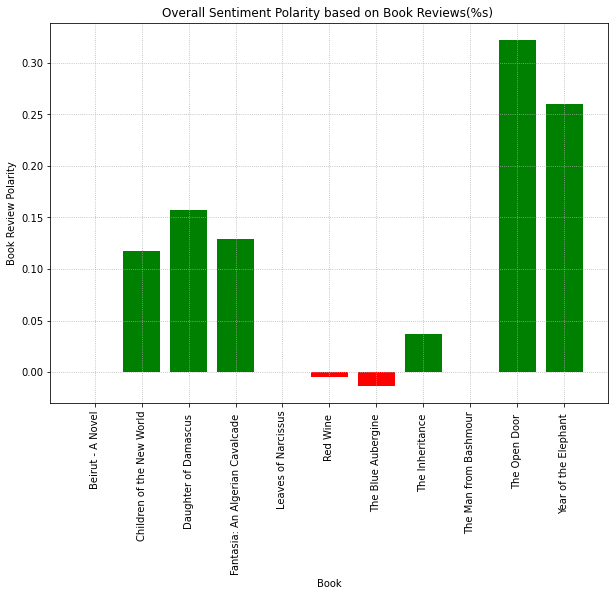

In [ ]:
#Plotting polarity

x_axis = np.arange(len(df_new_agg_plot['Book']))
tick_locations = [value+0.4 for value in x_axis]
fig,ax=plt.subplots(figsize=(10, 7))
plt.xticks(tick_locations, df_new_agg_plot['Book'], rotation="vertical")

plot=plt.bar(df_new_agg_plot['Book'], df_new_agg_plot["polarity"], color=(df_new_agg_plot['polarity'] > 0).map({True: 'g', False: 'r'}), alpha=1, align="edge")
plt.grid()

#plt.title("Sentiment Analysis of Book Reviews " )
plt.title("Overall Sentiment Polarity based on Book Reviews(%s) ")
plt.xlabel("Book")
plt.ylabel("Book Review Polarity")
ax.grid(linestyle="dotted")


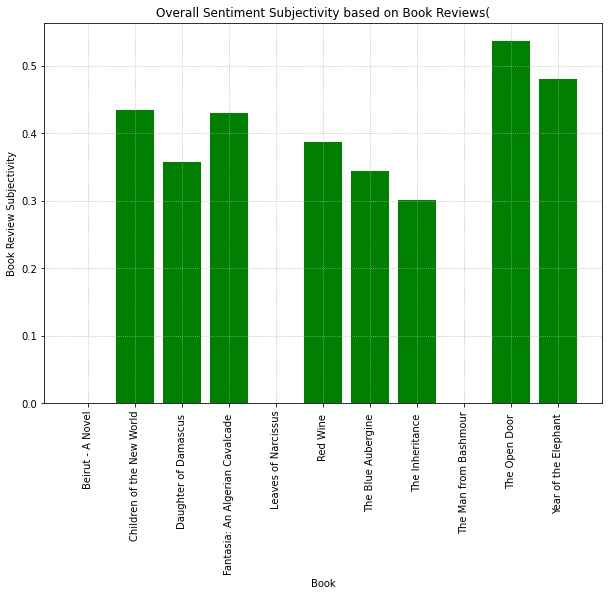

In [ ]:
#Plotting subjectivity

x_axis = np.arange(len(df_new_agg_plot['Book']))
tick_locations = [value+0.4 for value in x_axis]
fig,ax=plt.subplots(figsize=(10, 7))
plt.xticks(tick_locations, df_new_agg_plot['Book'], rotation="vertical")

plot=plt.bar(df_new_agg_plot['Book'], df_new_agg_plot["subjectivity"], color=(df_new_agg_plot['subjectivity'] > 0).map({True: 'g', False: 'r'}), alpha=1, align="edge")
plt.grid()

#plt.title("Sentiment Analysis of Book Reviews (%s) " )
plt.title("Overall Sentiment Subjectivity based on Book Reviews(")
plt.xlabel("Book")
plt.ylabel("Book Review Subjectivity")
ax.grid(linestyle="dotted")

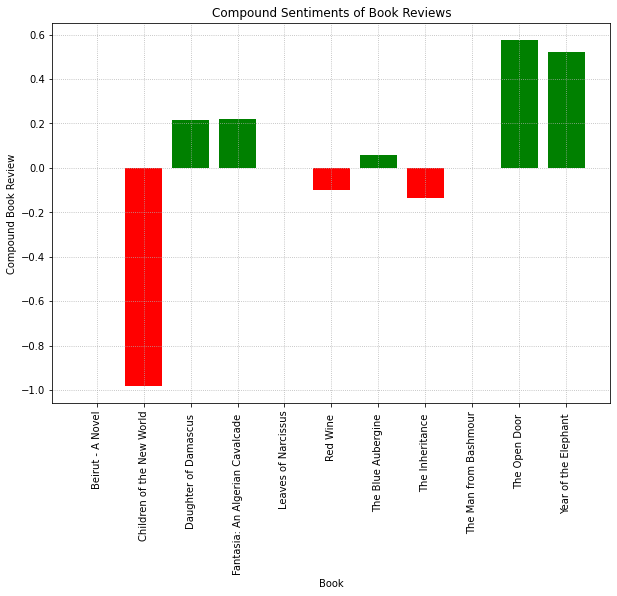

In [ ]:
#Plotting compound sentiment

x_axis = np.arange(len(df_txt_sent_plot['Book']))
tick_locations = [value+0.4 for value in x_axis]
fig,ax=plt.subplots(figsize=(10, 7))
plt.xticks(tick_locations, df_txt_sent_plot['Book'], rotation="vertical")

plot=plt.bar(df_txt_sent_plot['Book'], df_txt_sent_plot["Review Compound Sentiment Score"], color=(df_txt_sent_plot['Review Compound Sentiment Score'] > 0).map({True: 'g', False: 'r'}), alpha=1, align="edge")
plt.grid()

#plt.title("Compound Sentiments of Book Reviews" )
plt.title("Compound Sentiments of Book Reviews")
plt.xlabel("Book")
plt.ylabel("Compound Book Review")
ax.grid(linestyle="dotted")

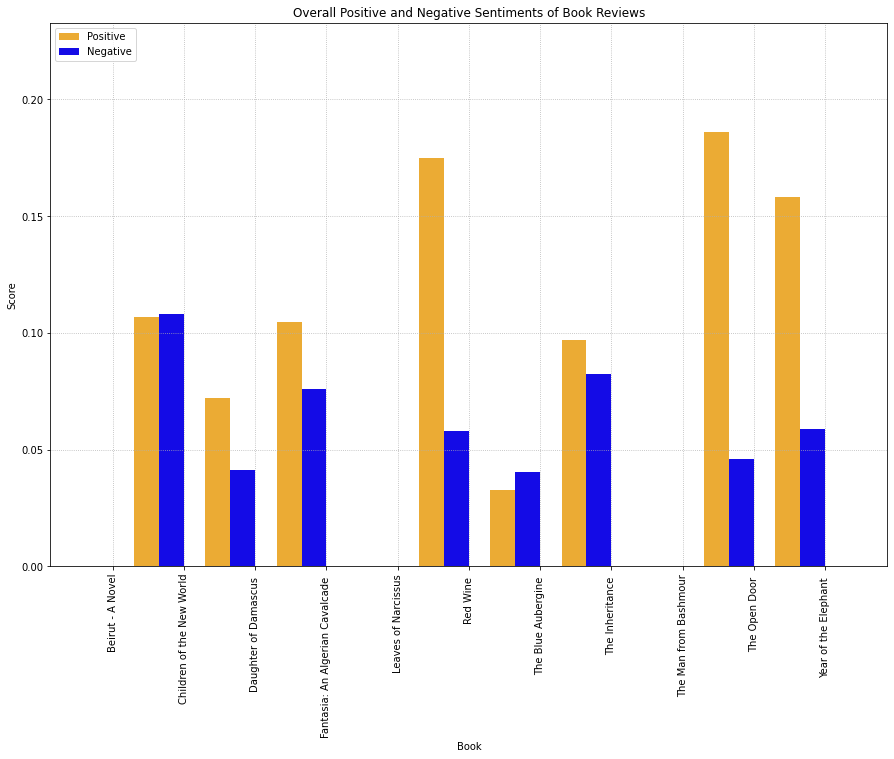

In [ ]:
# Setting the positions and width for the bars
pos = list(range(len(df_txt_sent_plot['Book'])))
width = 0.35

# Plotting the bars
fig, ax = plt.subplots(figsize=(15,10))

# Create a bar with positive sentiment data
plt.bar(pos, df_txt_sent_plot['Review Positive Sentiment Score'], width, alpha=1, color='#ebab34')

# Create a bar for negative
plt.bar([p + width for p in pos], df_txt_sent_plot['Review Negative Sentiment Score'], width, alpha=1, color='#140be6')

# Set the y and x axis label
ax.set_ylabel('Score')
ax.set_xlabel("Book")

# Set the labels for the x ticks
ax.set_xticklabels(df_txt_sent_plot['Book'])

# Set the position of the x ticks
tick_locations = [p + 1.5 * width for p in pos]
plt.xticks(tick_locations, df_txt_sent_plot['Book'], rotation="vertical")

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df_txt_sent_plot['Review Positive Sentiment Score'] + df_txt_sent_plot['Review Negative Sentiment Score'])] )


# Adding the legend and showing the plot
plt.legend(['Positive', 'Negative'], loc='upper left')

ax.grid(linestyle="dotted")
plt.title("Overall Positive and Negative Sentiments of Book Reviews")
plt.show()

#### **Publisher Reviews**

In [ ]:
auth.authenticate_user()

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
wb = gc.open_by_url('file')

In [ ]:
sheet = wb.worksheet('Publisher Blurbs (NEW VERSION)')
data = sheet.get_all_values()

In [ ]:
df_review_pub = pd.DataFrame(data)

In [ ]:
new_header = df_review_pub.iloc[0]
df_review_pub = df_review_pub[1:]
df_review_pub.columns = new_header 

In [ ]:
publisher_review = df_review_pub[['AUTHOR','TITLE','Editorial Blurbs/Blurbs by Outside Source','Reviewer source/name']]

In [ ]:
publisher_review = publisher_review[publisher_review['Editorial Blurbs/Blurbs by Outside Source'] != '0']
publisher_review['Editorial Blurbs/Blurbs by Outside Source'].replace('', np.nan, inplace=True)
publisher_review.dropna(subset=['Editorial Blurbs/Blurbs by Outside Source'], inplace=True)
publisher_review['TITLE'].replace('', np.nan, inplace=True)
publisher_review.dropna(subset=['TITLE'], inplace=True)
publisher_review['Editorial Blurbs'] = publisher_review['Editorial Blurbs/Blurbs by Outside Source'].str.replace('"', '')
del publisher_review['Editorial Blurbs/Blurbs by Outside Source']

In [ ]:
df_pub_review = publisher_review.copy()
publisher_review.head()

,AUTHOR,TITLE,Reviewer source/name,Editorial Blurbs
1,Layla Abu Zayd,Year of the Elephant,World Literature Today,At a time when there is growing interest in th...
2,Layla Abu Zayd,Year of the Elephant,"Ahmed Abd al-Salam al-Bakkah, Moroccan author ...","Leila Abouzeid has created a new style, a mosa..."
3,Layla Abu Zayd,Last Chapter (Modern Arabic Writing),,... a fascinating glimpse into a world mostly ...
4,Jokha Alharthi,Celestial Bodies,"-Marcia Lynx Qualey, The National","A richly imagined, engaging and poetic insight..."
5,Jokha Alharthi,Celestial Bodies,-Women In Translation',`Compelling...


In [ ]:
publisher_review_sentiment = publisher_review[['TITLE','Editorial Blurbs']]
publisher_review_sentiment[['polarity', 'subjectivity']] = publisher_review_sentiment['Editorial Blurbs'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [ ]:
publisher_review_sentiment.head()

,TITLE,Editorial Blurbs,polarity,subjectivity
1,Year of the Elephant,At a time when there is growing interest in th...,0.000000,0.000000
2,Year of the Elephant,"Leila Abouzeid has created a new style, a mosa...",0.124242,0.369697
3,Last Chapter (Modern Arabic Writing),... a fascinating glimpse into a world mostly ...,0.300000,0.725000
4,Celestial Bodies,"A richly imagined, engaging and poetic insight...",0.247222,0.477778
5,Celestial Bodies,`Compelling...,0.300000,0.600000


In [ ]:
get_sentiment_scores(df_pub_review,'Editorial Blurbs')

,AUTHOR,TITLE,Reviewer source/name,Editorial Blurbs,Editorial Blurbs Positive Sentiment Score,Editorial Blurbs Negative Sentiment Score,Editorial Blurbs Neutral Sentiment Score,Editorial Blurbs Compound Sentiment Score
1,Layla Abu Zayd,Year of the Elephant,World Literature Today,At a time when there is growing interest in th...,0.159,0.132,0.709,-0.0516
2,Layla Abu Zayd,Year of the Elephant,"Ahmed Abd al-Salam al-Bakkah, Moroccan author ...","Leila Abouzeid has created a new style, a mosa...",0.091,0.000,0.909,0.2500
3,Layla Abu Zayd,Last Chapter (Modern Arabic Writing),,... a fascinating glimpse into a world mostly ...,0.280,0.000,0.720,0.5423
4,Jokha Alharthi,Celestial Bodies,"-Marcia Lynx Qualey, The National","A richly imagined, engaging and poetic insight...",0.311,0.000,0.689,0.9184
5,Jokha Alharthi,Celestial Bodies,-Women In Translation',`Compelling...,0.000,0.000,1.000,0.0000
...,...,...,...,...,...,...,...,...
147,Latifah al-Zayyat,The Open Door,Naguib Mahfouz,Latifa al-Zayyat greatly helped all of us Egyp...,0.000,0.000,1.000,0.0000
148,Latifah al-Zayyat,The Open Door,Kirkus Reviews (Book Review Magazine),Absorbing ... Superbly translated ... Arguably...,0.289,0.089,0.622,0.6705
149,Latifah al-Zayyat,The Open Door,Choice,Recommended.,1.000,0.000,0.000,0.2023
150,Latifah al-Zayyat,The Open Door,Al Jadid,A pioneering work on many levels.,0.000,0.000,1.000,0.0000


In [ ]:
df_pub_review.head()

,AUTHOR,TITLE,Reviewer source/name,Editorial Blurbs,Editorial Blurbs Positive Sentiment Score,Editorial Blurbs Negative Sentiment Score,Editorial Blurbs Neutral Sentiment Score,Editorial Blurbs Compound Sentiment Score
1,Layla Abu Zayd,Year of the Elephant,World Literature Today,At a time when there is growing interest in th...,0.159,0.132,0.709,-0.0516
2,Layla Abu Zayd,Year of the Elephant,"Ahmed Abd al-Salam al-Bakkah, Moroccan author ...","Leila Abouzeid has created a new style, a mosa...",0.091,0.000,0.909,0.2500
3,Layla Abu Zayd,Last Chapter (Modern Arabic Writing),,... a fascinating glimpse into a world mostly ...,0.280,0.000,0.720,0.5423
4,Jokha Alharthi,Celestial Bodies,"-Marcia Lynx Qualey, The National","A richly imagined, engaging and poetic insight...",0.311,0.000,0.689,0.9184
5,Jokha Alharthi,Celestial Bodies,-Women In Translation',`Compelling...,0.000,0.000,1.000,0.0000


In [ ]:
publisher_review_sentiment_agg = publisher_review_sentiment.groupby(['TITLE']).mean().reset_index()
df_pub_review_agg = df_pub_review.groupby(['TITLE']).mean().reset_index()

In [ ]:
publisher_review_sentiment_agg.to_excel (r'publisher_review_sentiment.xlsx', index = False, header=True)
df_pub_review_agg.to_excel (r'df_pub_review.xlsx', index = False, header=True)

In [ ]:
df_pub_review_agg.head()

,TITLE,Editorial Blurbs Positive Sentiment Score,Editorial Blurbs Negative Sentiment Score,Editorial Blurbs Neutral Sentiment Score,Editorial Blurbs Compound Sentiment Score
0,"A Balcony Over the Fakihani: Three Novellas, 1993",0.108000,0.260000,0.632000,-0.62490
1,Absent (translated by Muhayman Jamil),0.244000,0.135000,0.621000,0.04228
2,Algerian White: A Narrative,0.046333,0.163333,0.790333,-0.29680
3,American Granddaughter,0.153000,0.087000,0.760000,0.13810
4,Blue Lorries – 2015,0.110000,0.111000,0.778500,-0.00380


In [ ]:
#select the books
array = ['The Blue Aubergine','Beirut - A Novel','Improvisations on a Missing String','Red Wine','Points of the Compass: Stories','Leaves of Narcissus',\
'The Inheritance','The Open Door','The Man from Bashmour','Daughter of Damascus','Year of the Elephant','Fantasia: An Algerian Cavalcade','Children of the New World']

df_pub_sent_plot = publisher_review_sentiment_agg.loc[publisher_review_sentiment_agg['TITLE'].isin(array)]
df_pub_agg_plot = df_pub_review_agg.loc[df_pub_review_agg['TITLE'].isin(array)]

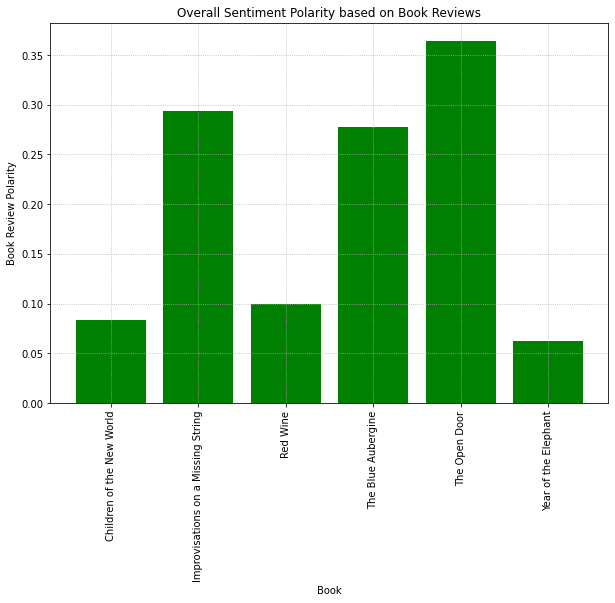

In [ ]:
#Plotting polarity

x_axis = np.arange(len(df_pub_sent_plot['TITLE']))
tick_locations = [value+0.4 for value in x_axis]
fig,ax=plt.subplots(figsize=(10, 7))
plt.xticks(tick_locations, df_pub_sent_plot['TITLE'], rotation="vertical")

plot=plt.bar(df_pub_sent_plot['TITLE'], df_pub_sent_plot["polarity"], color=(df_pub_sent_plot['polarity'] > 0).map({True: 'g', False: 'r'}), alpha=1, align="edge")
plt.grid()

#plt.title("Sentiment Analysis of Book Reviews " )
plt.title("Overall Sentiment Polarity based on Book Reviews")
plt.xlabel("Book")
plt.ylabel("Book Review Polarity")
ax.grid(linestyle="dotted")


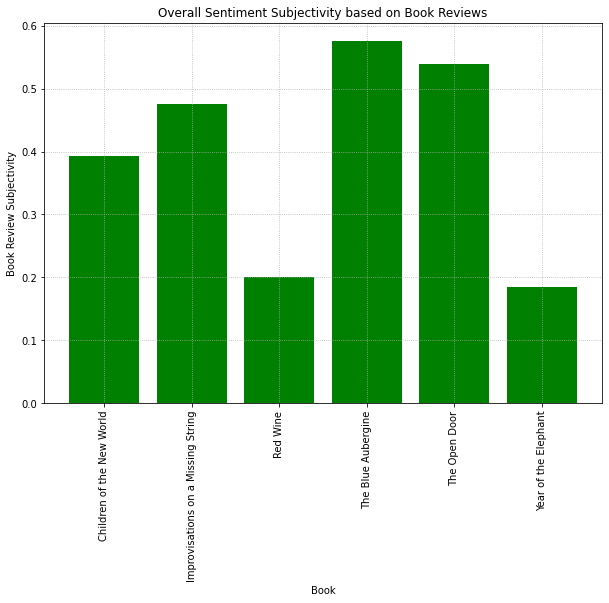

In [ ]:
#Plotting polarity

x_axis = np.arange(len(df_pub_sent_plot['TITLE']))
tick_locations = [value+0.4 for value in x_axis]
fig,ax=plt.subplots(figsize=(10, 7))
plt.xticks(tick_locations, df_pub_sent_plot['TITLE'], rotation="vertical")

plot=plt.bar(df_pub_sent_plot['TITLE'], df_pub_sent_plot["subjectivity"], color=(df_pub_sent_plot['subjectivity'] > 0).map({True: 'g', False: 'r'}), alpha=1, align="edge")
plt.grid()

#plt.title("Sentiment Analysis of Book Reviews " )
plt.title("Overall Sentiment Subjectivity based on Book Reviews")
plt.xlabel("Book")
plt.ylabel("Book Review Subjectivity")
ax.grid(linestyle="dotted")


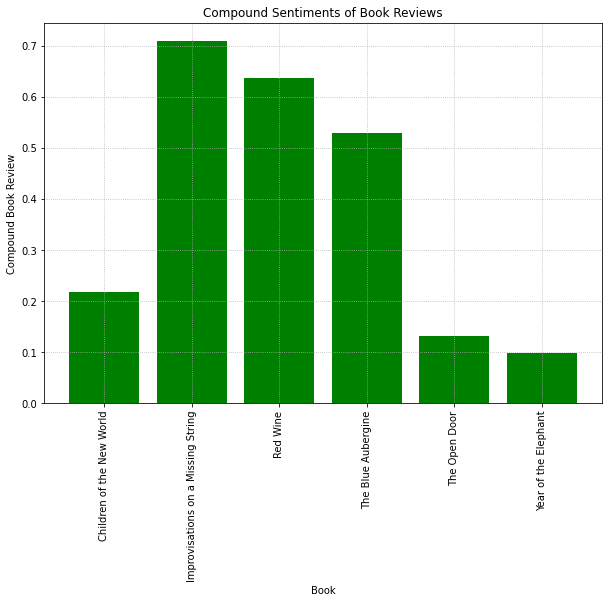

In [ ]:
#Plotting compound sentiment

x_axis = np.arange(len(df_pub_agg_plot['TITLE']))
tick_locations = [value+0.4 for value in x_axis]
fig,ax=plt.subplots(figsize=(10, 7))
plt.xticks(tick_locations, df_pub_agg_plot['TITLE'], rotation="vertical")

plot=plt.bar(df_pub_agg_plot['TITLE'], df_pub_agg_plot["Editorial Blurbs Compound Sentiment Score"], color=(df_pub_agg_plot['Editorial Blurbs Compound Sentiment Score'] > 0).map({True: 'g', False: 'r'}), alpha=1, align="edge")
plt.grid()

#plt.title("Compound Sentiments of Book Reviews" )
plt.title("Compound Sentiments of Book Reviews")
plt.xlabel("Book")
plt.ylabel("Compound Book Review")
ax.grid(linestyle="dotted")

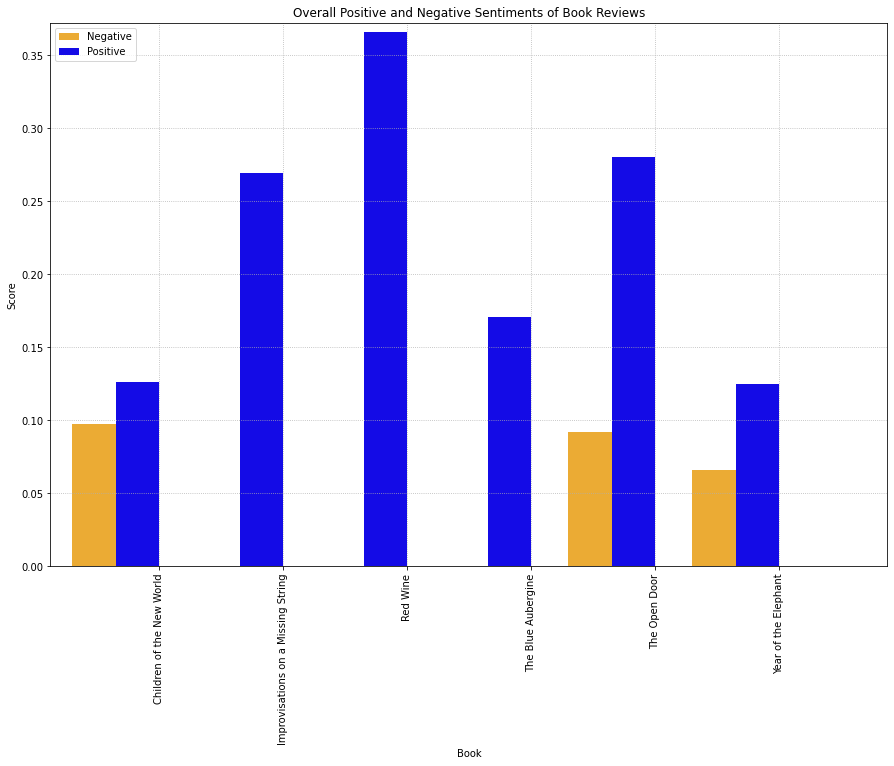

In [ ]:
# Setting the positions and width for the bars
pos = list(range(len(df_pub_agg_plot['TITLE'])))
width = 0.35

# Plotting the bars
fig, ax = plt.subplots(figsize=(15,10))

# Create a bar with positive sentiment data
plt.bar(pos, df_pub_agg_plot['Editorial Blurbs Negative Sentiment Score'], width, alpha=1, color='#ebab34')

# Create a bar for negative
plt.bar([p + width for p in pos], df_pub_agg_plot['Editorial Blurbs Positive Sentiment Score'], width, alpha=1, color='#140be6')

# Set the y and x axis label
ax.set_ylabel('Score')
ax.set_xlabel("Book")

# Set the labels for the x ticks
ax.set_xticklabels(df_pub_agg_plot['TITLE'])

# Set the position of the x ticks
tick_locations = [p + 1.5 * width for p in pos]
plt.xticks(tick_locations, df_pub_agg_plot['TITLE'], rotation="vertical")

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df_pub_agg_plot['Editorial Blurbs Negative Sentiment Score'] + df_pub_agg_plot['Editorial Blurbs Positive Sentiment Score'])] )


# Adding the legend and showing the plot
plt.legend(['Negative', 'Positive'], loc='upper left')

ax.grid(linestyle="dotted")
plt.title("Overall Positive and Negative Sentiments of Book Reviews")
plt.show()

#### **NRC Emotion** 

In [ ]:
publisher_emotion = publisher_review[['TITLE','Editorial Blurbs']]
reviewer_emotion = df_review[['Book','Review']]

In [ ]:
def get_nrc_data():
    nrc = "/content/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict


def emotion_analyzer(text,emotion_dict=get_nrc_data()):
    #Set up the result dictionary
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    #Analyze the text and normalize by total number of words
    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

In [ ]:
publisher_emotion[['sadness','surprise','positive','joy','negative','anticipation','disgust','fear','anger','trust']] = \
publisher_emotion['Editorial Blurbs'].apply(lambda Text: pd.Series(emotion_analyzer(Text)))

In [ ]:
reviewer_emotion[['sadness','surprise','positive','joy','negative','anticipation','disgust','fear','anger','trust']] = \
reviewer_emotion['Review'].apply(lambda Text: pd.Series(emotion_analyzer(Text)))

reviewer_emotion['Book']=reviewer_emotion['Book'].apply(remove_numbers)

In [ ]:
publisher_emotion.head()

,TITLE,Editorial Blurbs,sadness,surprise,positive,joy,negative,anticipation,disgust,fear,anger,trust
1,Year of the Elephant,At a time when there is growing interest in th...,0.040000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.040000
2,Year of the Elephant,"Leila Abouzeid has created a new style, a mosa...",0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,Last Chapter (Modern Arabic Writing),... a fascinating glimpse into a world mostly ...,0.083333,0.000000,0.000000,0.0,0.0,0.083333,0.083333,0.000000,0.0,0.083333
4,Celestial Bodies,"A richly imagined, engaging and poetic insight...",0.026316,0.026316,0.026316,0.0,0.0,0.026316,0.000000,0.026316,0.0,0.026316
5,Celestial Bodies,`Compelling...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [ ]:
reviewer_emotion.head()

,Book,Review,sadness,surprise,positive,joy,negative,anticipation,disgust,fear,anger,trust
0,Year of the Elephant,The independence of Abouzeid's subtitle is bot...,0.030471,0.058172,0.016620,0.008310,0.024931,0.016620,0.030471,0.033241,0.019391,0.041551
2,Year of the Elephant,It shows the conflicting visions of colonial i...,0.000000,0.000000,0.012821,0.000000,0.025641,0.025641,0.038462,0.000000,0.012821,0.038462
5,Year of the Elephant,"Leila Abouzeid's novella, ‘Ām al-fīl / Year of...",0.020057,0.054441,0.008596,0.017192,0.020057,0.022923,0.037249,0.017192,0.020057,0.042980
6,Year of the Elephant,Maybe this would have had more of an impact on...,0.025974,0.043290,0.025974,0.000000,0.000000,0.004329,0.004329,0.038961,0.000000,0.047619
7,Year of the Elephant,I used this course in an introductory anthropo...,0.035294,0.023529,0.000000,0.000000,0.000000,0.011765,0.000000,0.023529,0.000000,0.023529


In [ ]:
df_agg_emtn = publisher_emotion.groupby(['TITLE']).mean().reset_index()

In [ ]:
df_agg_emtn.head() #publisher reviews

,TITLE,sadness,surprise,positive,joy,negative,anticipation,disgust,fear,anger,trust
0,"A Balcony Over the Fakihani: Three Novellas, 1993",0.000000,0.000000,0.000000,0.050000,0.050000,0.10000,0.100000,0.000000,0.000000,0.000000
1,Absent (translated by Muhayman Jamil),0.003774,0.023821,0.007547,0.000000,0.012500,0.01250,0.012500,0.007547,0.012500,0.049146
2,Algerian White: A Narrative,0.084214,0.053559,0.000000,0.000000,0.090909,0.00000,0.053206,0.053559,0.038055,0.061311
3,American Granddaughter,0.000000,0.000000,0.011905,0.011905,0.023810,0.02381,0.023810,0.011905,0.000000,0.023810
4,Blue Lorries – 2015,0.000000,0.000000,0.000000,0.050000,0.050000,0.05000,0.050000,0.000000,0.050000,0.000000


In [ ]:
df_review_emtn_agg = reviewer_emotion.groupby(['Book']).mean().reset_index()

In [ ]:
df_review_emtn_agg.head() #user reviews

,Book,sadness,surprise,positive,joy,negative,anticipation,disgust,fear,anger,trust
0,A Balcony Over The Fakihani,0.010874,0.017247,0.004426,0.008733,0.023948,0.032600,0.038879,0.021312,0.022286,0.035013
1,A Sister to Scheherazade,0.015402,0.013375,0.006707,0.009169,0.011481,0.014336,0.018649,0.015512,0.010067,0.036209
2,A Sky So Close,0.005764,0.014409,0.000000,0.005764,0.008646,0.005764,0.008646,0.008646,0.000000,0.020173
3,A compass for the sunflower,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Absent,0.019713,0.014996,0.008643,0.007759,0.012134,0.013146,0.017055,0.011653,0.007887,0.039666




#### **Plotting the NRC Emotions**

Reviewer Emotion Analysis

In [ ]:
#select the books
array = ['The Blue Aubergine ','Beirut - A Novel','Improvisations on a Missing String','Red Wine ','Points of the Compass: Stories','Leaves of Narcissus',\
'The Inheritance ','The Open Door ','The Man from Bashmour','Daughter of Damascus ','Year of the Elephant ','Fantasia: An Algerian Cavalcade ','Children of the New World']

df_revier_emtn_plt = df_review_emtn_agg.loc[df_review_emtn_agg['Book'].isin(array)]

In [ ]:
Df_reviewr = df_revier_emtn_plt[(df_revier_emtn_plt['sadness']>0)|(df_revier_emtn_plt['surprise']>0)|(df_revier_emtn_plt['positive']>0)|(df_revier_emtn_plt['joy']>0)|\
                 (df_revier_emtn_plt['negative']>0)|(df_revier_emtn_plt['anticipation']>0)|(df_revier_emtn_plt['disgust']>0)|(df_revier_emtn_plt['fear']>0)| \
                  (df_revier_emtn_plt['anger']>0)|(df_revier_emtn_plt['trust']>0)]

In [ ]:
Df_reviewr = Df_reviewr[['Book','sadness','surprise','joy','anticipation','disgust','fear','anger','trust']]

In [ ]:
df_reviewer_heat = Df_reviewr.melt(id_vars=["Book"], 
         var_name="Emotions", 
         value_name="Emtn_Val")

In [ ]:
fig = px.treemap(df_reviewer_heat, path=['Book', 'Emotions'], values='Emtn_Val',
                  hover_data=['Emtn_Val'],
                  color_continuous_scale='day')

fig.update_layout(treemapcolorway = ["#46B005", "#112AA9", "#7611A9", "#A91197", "#A9114B", "#B00505", "#A8B005","#15CDE6"])
fig.update_layout(
    margin = {'t':0, 'l':0, 'r':0, 'b':0}
)
fig.update_layout(uniformtext=dict(minsize=10, mode='hide'))
fig.show()


Publisher Emotion Analysis

In [ ]:
 #select the books
array = ['The Blue Aubergine','Beirut - A Novel','Improvisations on a Missing String','Red Wine','Points of the Compass: Stories','Leaves of Narcissus',\
'The Inheritance','The Open Door','The Man from Bashmour','Daughter of Damascus','Year of the Elephant','Fantasia: An Algerian Cavalcade','Children of the New World']

df_publisher_emtn_plt = df_agg_emtn.loc[df_agg_emtn['TITLE'].isin(array)]

In [ ]:
Df_publisher = df_publisher_emtn_plt[(df_publisher_emtn_plt['sadness']>0)|(df_publisher_emtn_plt['surprise']>0)|(df_publisher_emtn_plt['positive']>0)|(df_publisher_emtn_plt['joy']>0)|\
                 (df_publisher_emtn_plt['negative']>0)|(df_publisher_emtn_plt['anticipation']>0)|(df_publisher_emtn_plt['disgust']>0)|(df_publisher_emtn_plt['fear']>0)| \
                  (df_publisher_emtn_plt['anger']>0)|(df_publisher_emtn_plt['trust']>0)]

In [ ]:
Df_publisher = Df_publisher[['TITLE','sadness','surprise','joy','anticipation','disgust','fear','anger','trust']]

In [ ]:
df_publisher_heat = Df_publisher.melt(id_vars=["TITLE"], 
         var_name="Emotions", 
         value_name="Emtn_Val")

In [ ]:
fig = px.treemap(df_publisher_heat, path=['TITLE', 'Emotions'], values='Emtn_Val',
                  hover_data=['Emtn_Val'],
                  color_continuous_scale='day')

fig.update_layout(treemapcolorway = ["#46B005", "#112AA9", "#7611A9", "#A91197", "#A9114B", "#B00505", "#A8B005","#15CDE6"])
fig.update_layout(
    margin = {'t':0, 'l':0, 'r':0, 'b':0}
)
fig.update_layout(uniformtext=dict(minsize=10, mode='hide'))
fig.show()
